# Frequency of Beast 2 Files Having Problems 

author: Walter Xie

date: 26 May 2016

The package [ComMA](https://github.com/walterxie/ComMA) is used for visulization here.

In [1]:
suppressMessages(library("ComMA"))

# getwd()
# setwd("~/WorkSpace/beast2report/")

## 1. The frequency of classes being changed

Load [class.freq.text](data/class.freq.text) generated by the script introduced in README.

In [2]:
freq <- ComMA::readFile("data/class.freq.text", row.names=NULL)
freq <- freq[order(freq$count, decreasing=T),]


Upload file : 2 columns, 1648 rows excluding column names from row 1, from file data/class.freq.text 


### top 20 most frequently changed files

In [3]:
freq[1:20,]
max(freq$count)
min(freq$count)

,count,file
1648,191,src/beast/app/beauti/BeautiDoc.java
1647,140,src/beast/core/MCMC.java
1646,136,src/beast/app/beauti/Beauti.java
1645,124,src/beast/evolution/tree/Tree.java
1644,105,build.xml
1643,102,src/beast/app/beauti/AlignmentListInputEditor.java
1642,97,src/beast/util/TreeParser.java
1641,95,src/beast/util/XMLParser.java
1640,90,src/beast/evolution/tree/Node.java
1639,89,src/beast/core/Logger.java


[1] 191

[1] 1

Loading required package: scales
Warning message:
: Stacking not well defined when ymin != 0

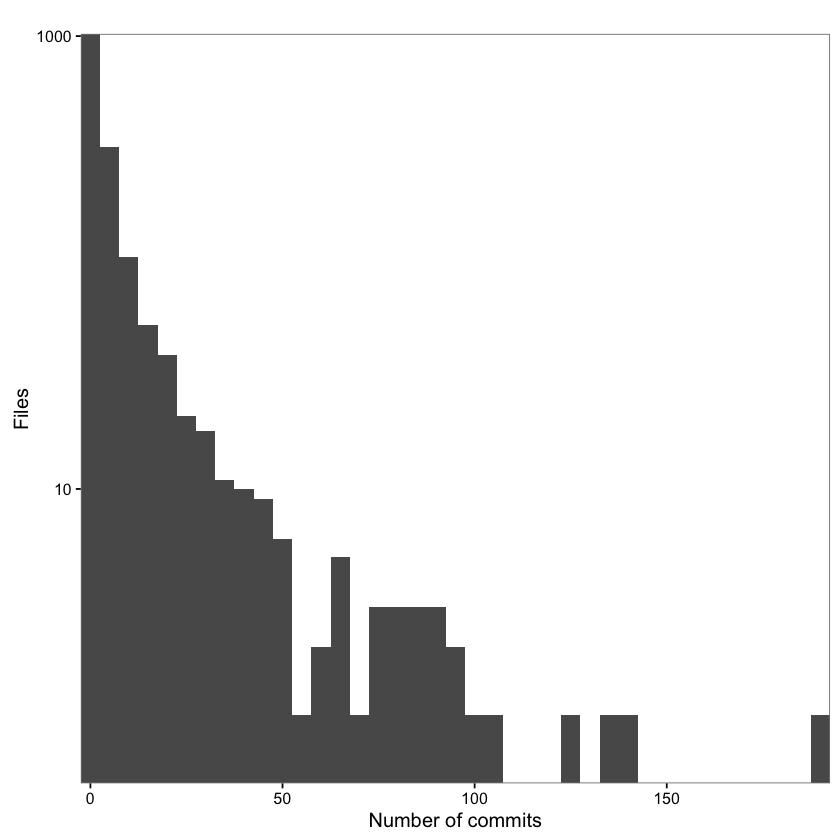

In [4]:
ggHistogram(freq, x.id="count", binwidth = 5, 
            x.lab="Number of commits", y.lab="Files", 
            y.trans="log", title="", verbose=F)

### remove files whose change < min.c

In [5]:
min.c = 50
freq <- freq[freq$count>=min.c,]
nrow(freq)

[1] 33

### BEAUTi

In [6]:
freq[grepl("beauti", freq$file) | grepl("draw", freq$file),]

,count,file
1648,191,src/beast/app/beauti/BeautiDoc.java
1646,136,src/beast/app/beauti/Beauti.java
1643,102,src/beast/app/beauti/AlignmentListInputEditor.java
1636,84,src/beast/app/beauti/BeautiPanel.java
1628,69,src/beast/app/draw/ListInputEditor.java
1625,67,src/beast/app/beauti/PriorListInputEditor.java
1623,64,src/beast/app/draw/InputEditor.java
1621,58,src/beast/app/beauti/TipDatesInputEditor.java
1619,51,src/beast/app/beauti/BeautiPanelConfig.java
1616,50,src/beast/app/beauti/BeautiSubTemplate.java


### Java but Not BEAUTi

In [7]:
freq[grepl(".java", freq$file) & 
     !(grepl("beauti", freq$file) | grepl("draw", freq$file)),]

,count,file
1647,140,src/beast/core/MCMC.java
1645,124,src/beast/evolution/tree/Tree.java
1642,97,src/beast/util/TreeParser.java
1641,95,src/beast/util/XMLParser.java
1640,90,src/beast/evolution/tree/Node.java
1639,89,src/beast/core/Logger.java
1638,88,src/beast/evolution/likelihood/TreeLikelihood.java
1637,86,src/beast/core/State.java
1635,83,src/beast/core/Input.java
1633,79,src/beast/evolution/alignment/Alignment.java


### rest

In [8]:
freq[!grepl(".java", freq$file),]

,count,file
1644,105,build.xml
1634,81,templates/Standard.xml
1630,76,templates/SubstModels.xml
1629,75,templates/StarBeast.xml


## 2. The frequency of classes associated to unique issues

Load [issue_dist.text](data/issue_dist.text) generated by the script introduced in README.

In [9]:
issue <- ComMA::readFile("data/issue_dist.text", sep=" ", row.names=NULL)
issue <- issue[order(issue$count, decreasing=T),]


Upload file : 2 columns, 637 rows excluding column names from row 1, from file data/issue_dist.text 


In [10]:
issue[1:20,]
max(issue$count)
min(issue$count)

,file,count
1,build.xml,27
193,src/beast/app/beauti/Beauti.java,25
192,src/beast/app/beauti/BeautiDoc.java,24
455,src/beast/util/AddOnManager.java,24
293,src/beast/core/MCMC.java,19
475,src/beast/util/TreeParser.java,19
189,src/beast/app/beauti/BeautiAlignmentProvider.java,17
181,src/beast/app/beastapp/BeastMain.java,16
187,src/beast/app/beauti/AlignmentListInputEditor.java,16
468,src/beast/util/NexusParser.java,16


[1] 27

[1] 1

Warning message:
: Stacking not well defined when ymin != 0

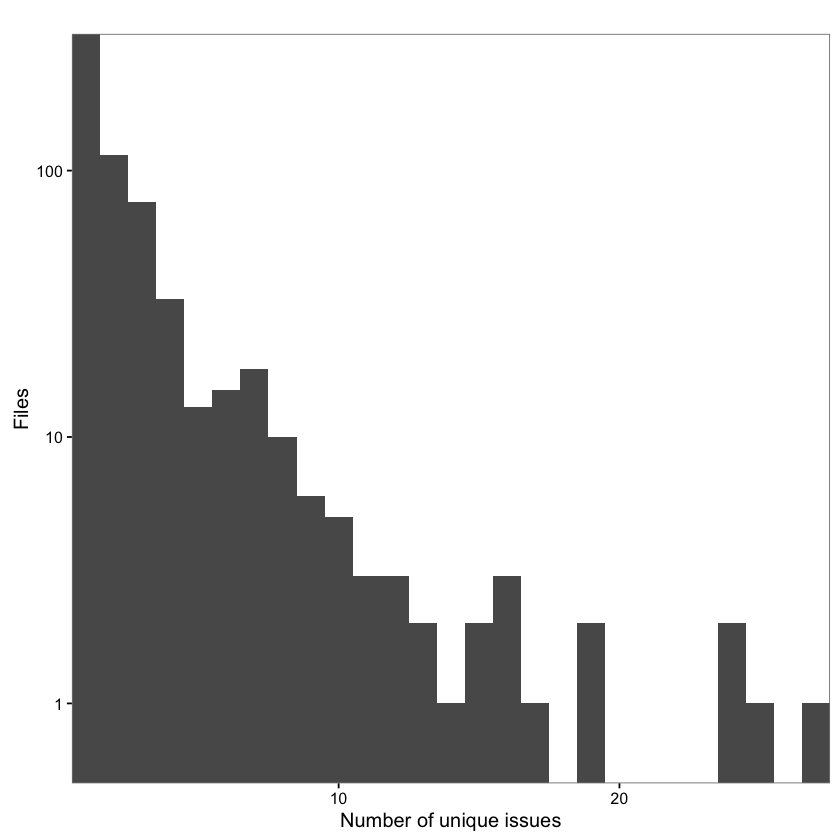

In [11]:
ggHistogram(issue, x.id="count", binwidth = 1, 
            x.lab="Number of unique issues", y.lab="Files", 
            y.trans="log", title="", verbose=F)

### remove files whose change < min.c

In [12]:
min.c = 7
issue <- issue[issue$count>=min.c,]
nrow(issue)

[1] 60

### BEAUTi

In [13]:
issue[grepl("beauti", issue$file) | grepl("draw", issue$file),]

,file,count
193,src/beast/app/beauti/Beauti.java,25
192,src/beast/app/beauti/BeautiDoc.java,24
189,src/beast/app/beauti/BeautiAlignmentProvider.java,17
187,src/beast/app/beauti/AlignmentListInputEditor.java,16
206,src/beast/app/beauti/JPackageDialog.java,11
196,src/beast/app/beauti/BeautiPanel.java,10
215,src/beast/app/beauti/SiteModelInputEditor.java,10
219,src/beast/app/beauti/TaxonSetInputEditor.java,10
214,src/beast/app/beauti/PriorListInputEditor.java,9
239,src/beast/app/draw/ListInputEditor.java,9


### Java but Not BEAUTi

In [14]:
issue[grepl(".java", issue$file) & 
     !(grepl("beauti", issue$file) | grepl("draw", issue$file)),]

,file,count
455,src/beast/util/AddOnManager.java,24
293,src/beast/core/MCMC.java,19
475,src/beast/util/TreeParser.java,19
181,src/beast/app/beastapp/BeastMain.java,16
468,src/beast/util/NexusParser.java,16
271,src/beast/app/treeannotator/TreeAnnotator.java,15
316,src/beast/evolution/alignment/Alignment.java,15
292,src/beast/core/Logger.java,14
180,src/beast/app/beastapp/BeastLauncher.java,13
257,src/beast/app/tools/LogCombiner.java,13


### rest

In [15]:
issue[!grepl(".java", issue$file),]

,file,count
1,build.xml,27
634,templates/StarBeast.xml,9
635,templates/SubstModels.xml,9
152,HISTORY.txt,7
162,release/common/VERSION,7
165,release/Linux/bin/beast,7
633,templates/Standard.xml,7


### 3. Merge

In [16]:
class.merge <- merge(freq, issue, by="file")
class.merge <- class.merge[order(class.merge$count.y, class.merge$count.x, 
                                 decreasing=T),]
class.merge[grepl(".java", class.merge$file),][1:20,]

,file,count.x,count.y
3,src/beast/app/beauti/Beauti.java,136,25
4,src/beast/app/beauti/BeautiDoc.java,191,24
22,src/beast/util/AddOnManager.java,77,24
15,src/beast/core/MCMC.java,140,19
24,src/beast/util/TreeParser.java,97,19
2,src/beast/app/beauti/AlignmentListInputEditor.java,102,16
23,src/beast/util/NexusParser.java,78,16
17,src/beast/evolution/alignment/Alignment.java,79,15
14,src/beast/core/Logger.java,89,14
25,src/beast/util/XMLParser.java,95,12


In [17]:
class.merge[!grepl(".java", class.merge$file),]

,file,count.x,count.y
1,build.xml,105,27
29,templates/SubstModels.xml,76,9
28,templates/StarBeast.xml,75,9
27,templates/Standard.xml,81,7
